## CNN model
### Learning from scratch (without data augmentation)

In [1]:
#initializing the model. Architecture similar to VGG16. Image input size 256x256x3

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

Metal device set to: Apple M1


2023-03-20 09:08:26.295396: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-20 09:08:26.296019: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
#importing the dataset. creating train and validation generators
#Dataset contains 5000 images. The train/val/test split is 60/20/20.

from keras.preprocessing.image import ImageDataGenerator

train_dir = "/Users/ajdinburnic/Desktop/Master Thesis/Dataset/train"
validation_dir = "/Users/ajdinburnic/Desktop/Master Thesis/Dataset/validation"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=30,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=30,
    class_mode='binary')


Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [3]:
#model compilation

from tensorflow.keras.optimizers.legacy import RMSprop #legacy vazno!!!

model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(learning_rate = 1e-4),
             metrics=['acc'])

In [4]:
#training

model_training = model.fit(train_generator,
                           steps_per_epoch=100,
                           epochs = 100,
                           validation_data=validation_generator,
                           validation_steps = 33)

Epoch 1/100


2023-03-20 09:08:51.106279: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-20 09:08:51.590368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.4980 - acc: 0.7650

2023-03-20 09:09:14.278087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 29s 252ms/step - loss: 0.4980 - acc: 0.7650 - val_loss: 0.4098 - val_acc: 0.8384
Epoch 2/100
100/100 [==============================] - 26s 264ms/step - loss: 0.3106 - acc: 0.8737 - val_loss: 0.2749 - val_acc: 0.8758
Epoch 3/100
100/100 [==============================] - 28s 280ms/step - loss: 0.2483 - acc: 0.9067 - val_loss: 0.2961 - val_acc: 0.8596
Epoch 4/100
100/100 [==============================] - 29s 287ms/step - loss: 0.2130 - acc: 0.9143 - val_loss: 0.1874 - val_acc: 0.9242
Epoch 5/100
100/100 [==============================] - 29s 292ms/step - loss: 0.1898 - acc: 0.9217 - val_loss: 0.2133 - val_acc: 0.9212
Epoch 6/100
100/100 [==============================] - 30s 295ms/step - loss: 0.1799 - acc: 0.9290 - val_loss: 0.1910 - val_acc: 0.9121
Epoch 7/100
100/100 [==============================] - 30s 299ms/step - loss: 0.1684 - acc: 0.9343 - val_loss: 0.1422 - val_acc: 0.9374
Epoch 8/100
100/100 [==============================] - 30s 2

Epoch 61/100
100/100 [==============================] - 31s 314ms/step - loss: 0.0082 - acc: 0.9983 - val_loss: 0.3299 - val_acc: 0.9505
Epoch 62/100
100/100 [==============================] - 32s 315ms/step - loss: 0.0011 - acc: 0.9997 - val_loss: 0.4600 - val_acc: 0.9394
Epoch 63/100
100/100 [==============================] - 31s 312ms/step - loss: 0.0014 - acc: 0.9993 - val_loss: 0.3205 - val_acc: 0.9566
Epoch 64/100
100/100 [==============================] - 31s 314ms/step - loss: 0.0017 - acc: 0.9990 - val_loss: 0.2998 - val_acc: 0.9606
Epoch 65/100
100/100 [==============================] - 31s 313ms/step - loss: 0.0017 - acc: 0.9993 - val_loss: 0.3024 - val_acc: 0.9545
Epoch 66/100
100/100 [==============================] - 31s 314ms/step - loss: 7.9026e-04 - acc: 0.9997 - val_loss: 0.3003 - val_acc: 0.9576
Epoch 67/100
100/100 [==============================] - 31s 314ms/step - loss: 0.0029 - acc: 0.9987 - val_loss: 0.3211 - val_acc: 0.9556
Epoch 68/100
100/100 [===============

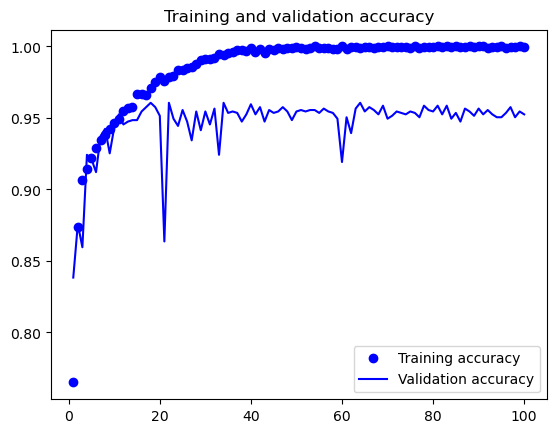

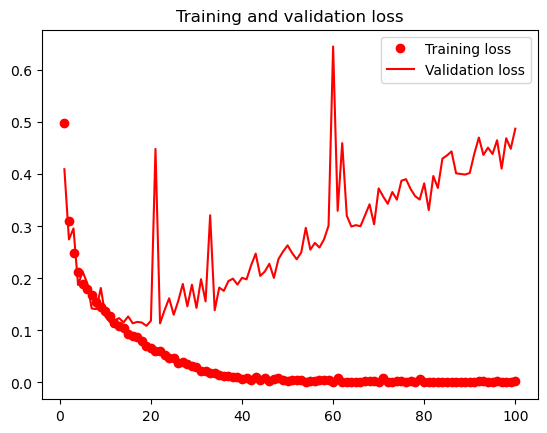

In [5]:
import matplotlib.pyplot as plt

acc = model_training.history['acc']
val_acc = model_training.history['val_acc']
loss = model_training.history['loss']
val_loss = model_training.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()